<a href="https://colab.research.google.com/github/sandipanpaul21/logistic-regression-in-python/blob/main/09_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from IPython.display import Image

**Goal is to find the logistic regression function** 
- 𝑝(𝐱) such that the predicted responses 𝑝(𝐱ᵢ) are as close as possible to the actual response 𝑦ᵢ for each observation 𝑖 = 1, …, 𝑛. 
- Remember that the actual response can be only 0 or 1 in binary classification problems
- This means that each 𝑝(𝐱ᵢ) should be close to either 0 or 1. That’s why it’s convenient to use the sigmoid function.

**Logistic regression**
- It is a linear classifier, so we’ll use a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, also called the **logit**. 
- The variables 𝑏₀, 𝑏₁, …, 𝑏ᵣ are the estimators of the regression coefficients, which are also called the **predicted weights or just coefficients.**
- The logistic regression function 𝑝(𝐱) is the **sigmoid function** of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it’s often close to either 0 or 1. 
- The function 𝑝(𝐱) is often interpreted as the **predicted probability** that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.
- Logistic regression determines the best predicted weights 𝑏₀, 𝑏₁, …, 𝑏ᵣ such that the function 𝑝(𝐱) is as close as possible to all actual responses 𝑦ᵢ, 𝑖 = 1, …, 𝑛, where 𝑛 is the number of observations. The process of calculating the best weights using available observations is called **model training or fitting**.
- To get the best weights, you usually maximize the log-likelihood function (LLF) for all observations 𝑖 = 1, …, 𝑛. This method is called the **maximum likelihood estimation** and is represented by the equation LLF = Σᵢ(𝑦ᵢ log(𝑝(𝐱ᵢ)) + (1 − 𝑦ᵢ) log(1 − 𝑝(𝐱ᵢ))).
- When 𝑦ᵢ = 0, the LLF for the corresponding observation is equal to log(1 − 𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 0, then log(1 − 𝑝(𝐱ᵢ)) is close to 0. This is the result you want. If 𝑝(𝐱ᵢ) is far from 0, then log(1 − 𝑝(𝐱ᵢ)) drops significantly. You don’t want that result because your goal is to obtain the maximum LLF. Similarly, when 𝑦ᵢ = 1, the LLF for that observation is 𝑦ᵢ log(𝑝(𝐱ᵢ)). If 𝑝(𝐱ᵢ) is close to 𝑦ᵢ = 1, then log(𝑝(𝐱ᵢ)) is close to 0. If 𝑝(𝐱ᵢ) is far from 1, then log(𝑝(𝐱ᵢ)) is a large negative number.
- Once you determine the best weights that define the function 𝑝(𝐱), you can get the predicted outputs 𝑝(𝐱ᵢ) for any given input 𝐱ᵢ. For each observation 𝑖 = 1, …, 𝑛, the predicted output is 1 if 𝑝(𝐱ᵢ) > 0.5 and 0 otherwise. The threshold doesn’t have to be 0.5, but it usually is. You might define a lower or higher value if that’s more convenient for your situation.
- There’s one more important relationship between 𝑝(𝐱) and 𝑓(𝐱), which is that log(𝑝(𝐱) / (1 − 𝑝(𝐱))) = 𝑓(𝐱). This equality explains why 𝑓(𝐱) is the logit. It implies that 𝑝(𝐱) = 0.5 when 𝑓(𝐱) = 0 and that the predicted output is 1 if 𝑓(𝐱) > 0 and 0 otherwise.

**Type of Logistic Regression**
1. **Single-Variate Logistic Regression**
  - Below is an example of Single Variate Logistic Regression
  - There is only one independent variable (or feature), which is 𝐱 = 𝑥. 
  - Here, you have a given set of input-output (or 𝑥-𝑦) pairs, represented by green circles. These are your observations. Remember that 𝑦 can only be 0 or 1. For example, the leftmost green circle has the input 𝑥 = 0 and the actual output 𝑦 = 0. The rightmost observation has 𝑥 = 9 and 𝑦 = 1.
  - Logistic regression finds the weights 𝑏₀ and 𝑏₁ that correspond to the maximum LLF. 
  - These weights define the logit 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥, which is the dashed black line. 
  - They also define the predicted probability 𝑝(𝑥) = 1 / (1 + exp(−𝑓(𝑥))), shown here as the full black line. 
  - In this case, the threshold 𝑝(𝑥) = 0.5 and 𝑓(𝑥) = 0 corresponds to the value of 𝑥 slightly higher than 3. This value is the limit between the inputs with the predicted outputs of 0 and 1.

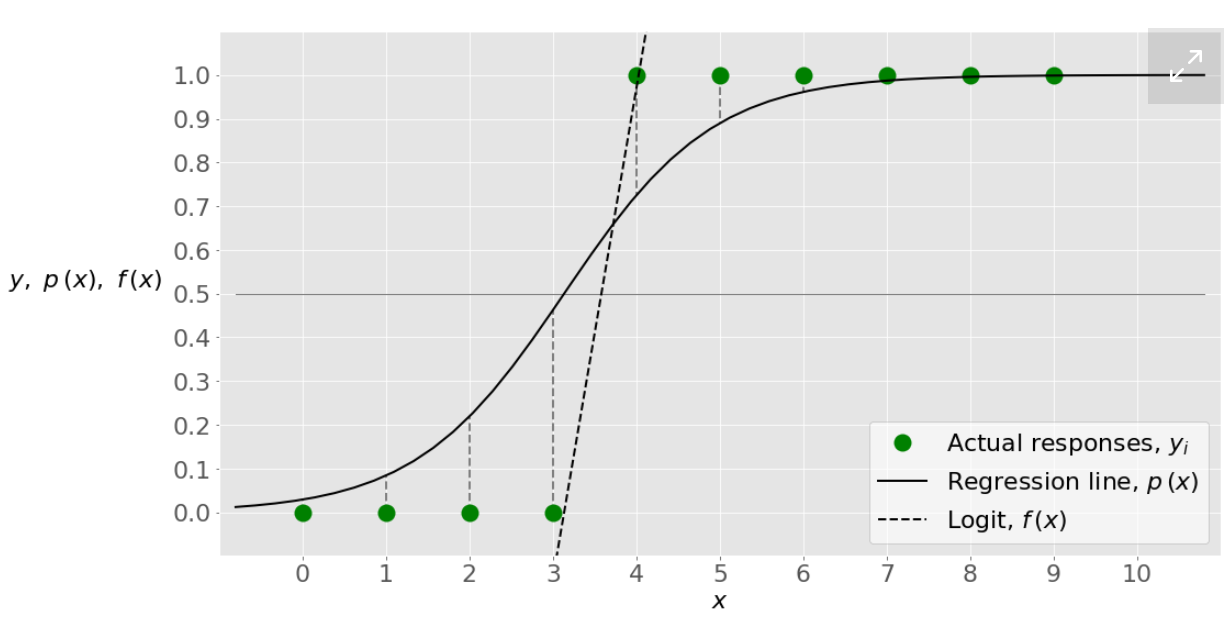

In [5]:
Image('/content/drive/MyDrive/Demo Images/File_701.png')

  2. **Multi-Variate Logistic Regression**
    - Multi-variate logistic regression has more than one input variable. This figure shows the classification with two independent variables, 𝑥₁ and 𝑥₂.
    - The graph is different from the single-variate graph because both axes represent the inputs. The outputs also differ in color. The white circles show the observations classified as zeros, while the green circles are those classified as ones.
  - Logistic regression determines the weights 𝑏₀, 𝑏₁, and 𝑏₂ that maximize the LLF. Once you have 𝑏₀, 𝑏₁, and 𝑏₂, you can get:
    - The logit 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂
    - The probabilities 𝑝(𝑥₁, 𝑥₂) = 1 / (1 + exp(−𝑓(𝑥₁, 𝑥₂)))
  - The dash-dotted black line linearly separates the two classes. This line corresponds to 𝑝(𝑥₁, 𝑥₂) = 0.5 and 𝑓(𝑥₁, 𝑥₂) = 0.

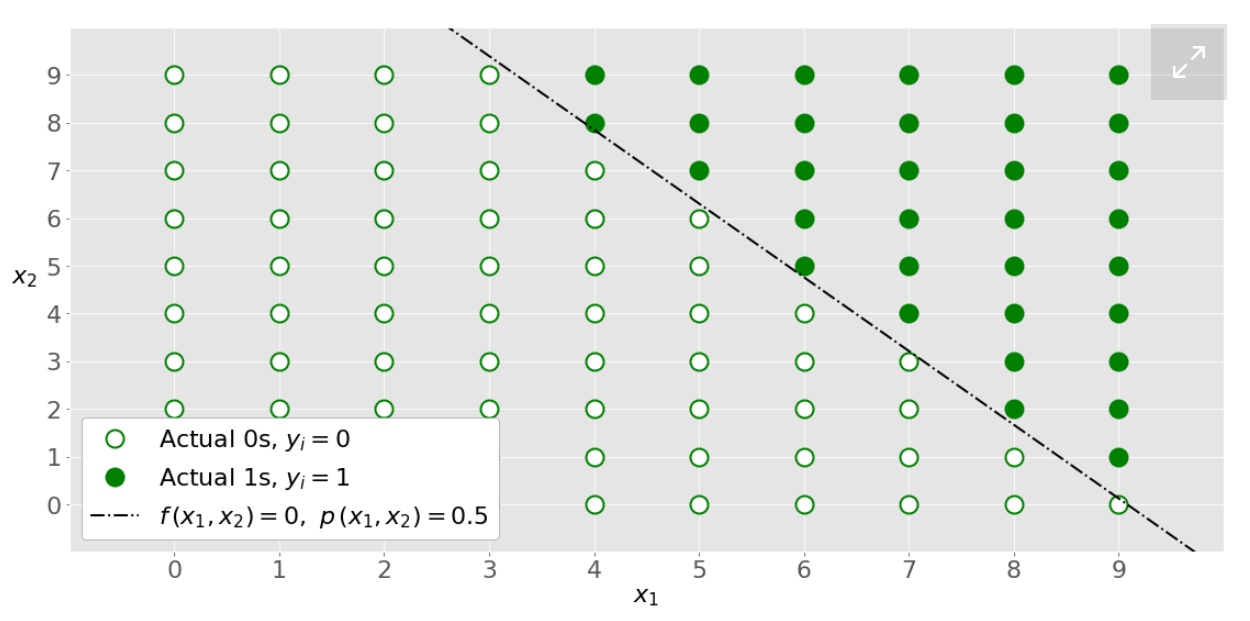

In [6]:
Image('/content/drive/MyDrive/Demo Images/File_702.png')

**Regularization**
- **Overfitting** is one of the most serious kinds of problems related to machine learning. It occurs when a model learns the training data too well. The model then learns not only the relationships among data but also the noise in the dataset. 
- Overfitted models tend to have good performance with the data used to fit them (the training data), but they behave poorly with unseen data (or test data, which is data not used to fit the model).
- Overfitting usually occurs with complex models. 
- **Regularization** normally tries to reduce or penalize the complexity of the model. Regularization techniques applied with logistic regression mostly tend to penalize large coefficients 𝑏₀, 𝑏₁, …, 𝑏ᵣ:
  1. *L1 regularization* penalizes the LLF with the scaled sum of the absolute values of the weights: |𝑏₀|+|𝑏₁|+⋯+|𝑏ᵣ|.
  2. *L2 regularization* penalizes the LLF with the scaled sum of the squares of the weights: 𝑏₀²+𝑏₁²+⋯+𝑏ᵣ².
  3. *Elastic-net regularization* is a linear combination of L1 and L2 regularization.
Regularization can significantly improve model performance on unseen data.



In [2]:
import pandas as pd
import numpy as np

## Loading data directly from UCLA
df = pd.read_stata("https://stats.idre.ucla.edu/stat/stata/dae/binary.dta")

## Loading data from our GitHub
df2 = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/admission.csv")

## Taking a look at the data
df.describe()

# Inference : 
# Looking at the descriptive statistics, 
# 31% of the students get admitted to a graduate program, 
# the average GRE score is 587 with a large standard deviation, 
# the average GPA is 3.39
# the average undergraduate school prestige is 2.49.

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,587.700012,3.389901,2.485000
std,0.466087,115.516663,0.380567,0.944462
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.395000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [3]:
# One thing to keep in mind, 
# the variable “rank” is truly categorical 

## Converting variable to categorical data type (since that what it is)
## and then creating dummy variables
df['rank'] = df['rank'].astype('category')

#df = pd.get_dummies(df)

Text(0.5, 1.0, 'GRE Log Odds Linear Plot')

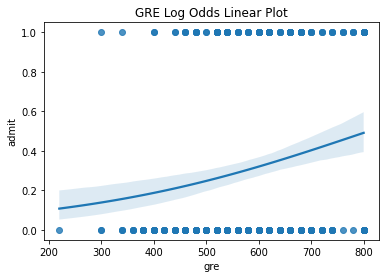

In [4]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf

# For plotting/checking assumptions
import seaborn as sns

# Assumption 1
# Continuous IVs being Linearly Related to the Log Odds
# Logistic regression does not require the continuous IV(s) to be linearly related to the DV. 
# It does require the continuous IV(s) be linearly related to the log odds of the IV though. 
# A way to test this is to plot the IV(s) in question and look for an S-shaped curve. 
# Sometimes the S-shape will not be obvious. 
# The plot should have a flat or flat-ish top and bottom with an increase or decreasing middle.

gre = sns.regplot(x= 'gre', y= 'admit', data= df, logistic= True).set_title("GRE Log Odds Linear Plot")
gre

Text(0.5, 1.0, 'GPA Log Odds Linear Plot')

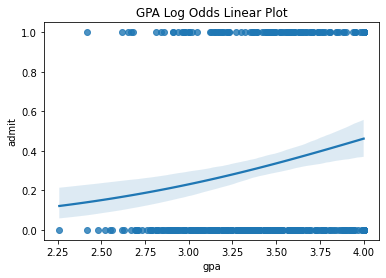

In [5]:
gpa = sns.regplot(x= 'gpa', y= 'admit', data= df, logistic= True).set_title("GPA Log Odds Linear Plot")
gpa

# Inference : 
# It may be hard to see, but the data does have somewhat of a curve occurring 
# that resembles the S-shaped curve that is required. 
# If a non-S-shaped line were to be present, sometimes a U-shape will be present, 
# how to handle that data needs to be considered.

In [6]:
# Assumption 2
# Absence of Multicollinearity
# An easy way to test this is to use a correlation matrix,
# and look for any highly correlated variables, 
# and/or to look at for high Variance Inflation Factor (VIF) scores. 
# If there are variables that are highly correlated, or have a high VIF, 
# a corrective action would be to drop one of them since they are measuring the same/similar thing.

df.corr()

# Inference : 
# No Multicollinearity

,admit,gre,gpa
admit,1.000000,0.184434,0.178212
gre,0.184434,1.000000,0.384266
gpa,0.178212,0.384266,1.000000


Text(0.5, 1.0, 'GPA and Rank Box Plot')

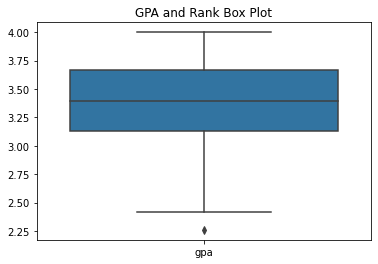

In [7]:
# Assumption 3
# Lack of outliers
# The assumption of lack of outliers is an easy one to check. 
# One can get a feel of this with the descriptive statistics provided by the .describe() method. 
# The easiest way to check for outliers is to use a box plot.
# Do to there being a drastic difference between the values used to measure GRE and the GPA/ Rank,
# two separate box plot charts will be produced.

gpa_rank_box = sns.boxplot(data= df[['gpa', 'rank']]).set_title("GPA and Rank Box Plot")
gpa_rank_box

Text(0.5, 1.0, 'GRE Box Plot')

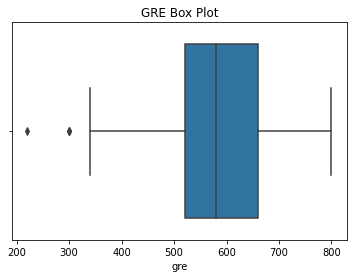

In [8]:
gre_box = sns.boxplot(x= 'gre', data= df, orient= 'v').set_title("GRE Box Plot")
gre_box

# Inference : 
# There looks to be 2 values that could be considered outliers for the GRE variable, 
# and 1 value for GPA variable. 
# In both of these cases, the values that are in question are not so far away from the rest 
# of the values in their respective variable. 
# Thus, the values can be kept and used in the analysis.

**Logistic Regression Model**

- The assumptions have been checked, and the data is good to run.
- For the “Rank” variable, one can either use the dummy variables created to look at multicollinearity or by using the “C(variable_of_interest)”. 
- If using the dummy variables, be sure to not include 1 of the groups to avoid the Dummy Variable Trap. The group dropped is then considered the reference group for the other dummy variables that came from the same original variable. Most commonly, the highest ranked group is dropped, or sometimes the lowest ranked group is dropped – it all depends on the hypothesis. 
- Using the “C(variable_of_interest)” method automatically does this.

**Recap**
- To recap, the analysis is looking into the effects GRE score, GPA, and undergraduate university prestige has on admission into the program. 
- Using the api formula method, the general structure is as follows smf.logit(formula=" DV ~ IV1 + IV2 + IVn, data= your_data_frame).

In [9]:
model= smf.logit(formula="admit~ gre + gpa + C(rank)", data= df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                 0.08292
Time:                        12:53:22   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2.0]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3.0]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4.0]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre                0.0023      0.001      2.070      0.038       0.000       0.004
gpa                0.8040      0.332      2.423      0.015       0.154       1.454
==================================================================================
"""

**INTERPRETING LOGISTIC REGRESSION**

- The model summary shows the coefficients, standard error, the associated z-score, and the 95% confidence intervals. 
- We interpret the results as follows, the overall model is significant indicated by a LLR p-value < 0.05 (7.578e-08) which allows us to look at the rest of the results. 
- All the IVs have a significant effect on the log odds of being admitted as indicated by the z values < 0.05.

**Numeric Variables**

- Interpreting continuous variables is not very different from interpreting them in a linear regression model. 
- For every one unit increase in gre score, the log odds of admission increase by 0.0023; for every one unit increase in gpa, the log odds of admission increase by 0.8040.

**Categorical Variables**

- The categorical variables have a different interpretation. 
- Since Rank 1 was dropped from the analysis, it is the comparison group and plays an important role in interpreting the other categories.
- For example, if an applicant attended a Rank 2 University compared to a Rank 1 University, there is a -0.6754 decrease in the log odds of admission; if an applicant attended a Rank 3 University compared to a Rank 1 University, there is a -1.3402 decrease in the log odds of admission.

**TAKING LOGISTIC REGRESSION A STEP FURTHER**

- Interpreting the log odds is not very straight forward when thinking about it’s effects. 
- An easier way to interpret the findings is by converting the coefficients of the logistic regression model into odd ratios. 
- This can be done by getting the exponent of the coefficient value.

In [10]:
# GETTING THE ODDS RATIOS, Z-VALUE, AND 95% CI
model_odds = pd.DataFrame(np.exp(model.params), columns= ['OR'])
model_odds['z-value']= model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
model_odds

,OR,z-value,2.5%,97.5%
Intercept,0.018500,0.000465,0.001981,0.172783
C(rank)[T.2.0],0.508931,0.032829,0.273692,0.946358
C(rank)[T.3.0],0.261792,0.000104,0.133055,0.515089
C(rank)[T.4.0],0.211938,0.000205,0.093443,0.480692
gre,1.002267,0.038465,1.000120,1.004418
gpa,2.234545,0.015388,1.166122,4.281877


**Now the interpretation is easier.** 
- Converting the logistic coefficients into odds ratios makes it easier to interpret the effects on the DV. 
- The confidence intervals have been converted to odds as well.

**Numeric Variables**
- For every one unit increase in gpa, the odds of being admitted increases by a factor of 2.235; for every one unit increase in gre score, the odds of being admitted increases by a factor of 1.002.

**Categorical Variables**
- Still interpreting the results in comparison to the group that was dropped. 
- Applicants from a Rank 2 University compared to a Rank 1 University are 0.509 as likely to be admitted; applicants from a Rank 3 University compared to a Rank 1 University are 0.262 as likely to be admitted, etc.